# Pandas and Data Manipulation

WTF is Pandas and why is it important to me?

## Arrays vs Pandas

## Datatable Operations

## Graphs?

In [2]:
import pandas as pd
import json

data = []

with open('alex_logs.log','r', encoding = "ISO-8859-1") as file:
    for line in file:
        datetime = line.split('] ')[0].split('[')[1]
        text = ' '.join(line.split('] ')[1:]).strip()
        data.append({'datetime':datetime,'text':text})

log_df = pd.DataFrame(data)
log_df_attempts = log_df[~log_df['text'].str.contains("Session") & ~log_df['text'].str.contains("ssh_bind_listen") & ~log_df['text'].str.contains("ssh-honeypot") & ~log_df['text'].str.contains("exchanging keys")]
log_df_attempts.reset_index(inplace=True)

In [22]:
log_df_attempts[['ip','user','password']] = log_df_attempts.text.str.split(expand=True, n=2)

/Users/pdd/Documents/repos/gitlab.com/python-for-security/venv/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [34]:
attempt_users = log_df_attempts['user'].value_counts()
attempt_password = log_df_attempts['password'].value_counts()
attempt_ip = log_df_attempts['ip'].value_counts()

log_df_attempts[log_df_attempts['password']=='admin']

index                  datetime                                 text  \
7         37  Fri Mar 27 03:30:40 2020          178.128.172.165 admin admin   
106      283  Fri Mar 27 15:47:12 2020           193.142.146.21 admin admin   
124      339  Fri Mar 27 16:39:18 2020          103.133.105.180 admin admin   
138      367  Fri Mar 27 16:40:16 2020  103.133.105.180 administrator admin   
197      486  Fri Mar 27 16:43:29 2020        103.133.105.180 support admin   
...      ...                       ...                                  ...   
48077  79989  Sat Apr  4 14:41:44 2020            45.13.199.102 admin admin   
48191  80174  Sat Apr  4 15:14:17 2020            113.172.98.71 admin admin   
48309  80351  Sat Apr  4 16:02:22 2020              218.92.0.204 root admin   
48605  80780  Sat Apr  4 17:32:30 2020           152.241.171.215 root admin   
48636  80841  Sat Apr  4 17:33:28 2020          152.241.171.215 admin admin   

                    ip           user password  
7      178.128.172.165          admin    admin  
106     193.142.146.21          admin    admin  
124    103.133.105.180          admin    admin  
138    103.133.105.180  administrator    admin  
197    103.133.105.180        support    admin  
...                ...            ...      ...  
48077    45.13.199.102          admin    admin  
48191    113.172.98.71          admin    admin  
48309     218.92.0.204           root    admin  
48605  152.241.171.215           root    admin  
48636  152.241.171.215          admin    admin  

[136 rows x 6 columns]

## Network Logs

In [2]:
import pandas as pd

logs_df = pd.read_json('./honeypot.json')

ValueError: Trailing data

In [2]:
from bs4 import BeautifulSoup
import requests

ssds_list = []

res = requests.get('https://www.newegg.com/p/pl?N=100011693%204814%20600038463&cm_sp=CAT_SSD_1-_-VisNav-_-2-5-Inch_1')

soup = BeautifulSoup(res.text, 'html.parser')
items = soup.findAll("div", {"class": "item-container"})
for item in items:
    name = item.find_all("a",{"class":"item-title"})[0].text
    price = item.find_all("li",{"class":"price-current"})[0].text.strip()
    price = price.split('(')[0].strip().split('\n')[0].strip()
    ssds_list.append({'name':name,'price':price})


In [21]:
import pandas as pd
import numpy as np

ssd_df = pd.DataFrame(ssds_list)
ssd_df['price_float'] = ssd_df['price'].apply(lambda x: float(x.split('$')[1]))

ssd_df

name    price  price_float
0   WD Blue 3D NAND 500GB Internal SSD - SATA III ...   $65.99        65.99
1   WD Blue 3D NAND 1TB Internal SSD - SATA III 6G...  $119.99       119.99
2   Team Group GX2 2.5" 512GB SATA III Internal So...   $59.99        59.99
3   Team Group GX1 2.5" 120GB SATA III Internal So...   $24.99        24.99
4   Crucial BX500 2.5" 240GB SATA III 3D NAND Inte...   $39.99        39.99
5   SAMSUNG 860 EVO Series 2.5" 1TB SATA III V-NAN...  $159.92       159.92
6   Team Group GX2 2.5" 256GB SATA III Internal So...   $40.99        40.99
7   Silicon Power Ace A55 2.5" 512GB SATA III 3D N...   $61.99        61.99
8   Kingston A400 2.5" 240GB SATA III 3D NAND Inte...   $39.99        39.99
9   Crucial MX500 2.5" 500GB SATA III 3D NAND Inte...   $70.99        70.99
10  WD Blue 3D NAND 250GB Internal SSD - SATA III ...   $49.99        49.99
11  Silicon Power Ace A55 2.5" 1TB SATA III 3D NAN...  $102.99       102.99
12  SAMSUNG 860 EVO Series 2.5" 250GB SATA III V-N...   $66.99        66.99
13  Crucial MX500 2.5" 1TB SATA III 3D NAND Intern...  $114.99       114.99
14  Team Group T-Force VULCAN 2.5" 1TB SATA III 3D...  $109.99       109.99
15  Silicon Power Ace A55 2.5" 256GB SATA III 3D T...   $39.99        39.99
16  Team Group GX1 2.5" 240GB SATA III Internal So...   $39.99        39.99
17  Team Group GX1 2.5" 960GB SATA III Internal So...   $99.99        99.99
18  Team Group L5 3D 2.5" 480GB SATA III 3D NAND I...   $59.99        59.99
19  Patriot Burst 2.5" 240GB SATA III Internal Sol...   $37.99        37.99
20  WD Blue 3D NAND 2TB Internal SSD - SATA III 6G...  $214.99       214.99
21  Kingston A400 2.5" 480GB SATA III 3D NAND Inte...   $59.99        59.99
22  SAMSUNG 860 QVO Series 2.5" 1TB SATA III Inter...  $119.57       119.57
23  Silicon Power Ace A55 2.5" 128GB SATA III 3D T...   $27.99        27.99
24  Crucial BX500 2.5" 120GB SATA III 3D NAND Inte...   $28.99        28.99
25  Team Group GX2 2.5" 128GB SATA III Internal So...   $27.99        27.99
26  SAMSUNG 860 EVO Series 2.5" 500GB SATA III V-N...   $84.99        84.99
27  SAMSUNG 860 EVO Series 2.5" 2TB SATA III 3D NA...  $339.95       339.95
28  Crucial MX500 2.5" 250GB SATA III 3D NAND Inte...   $50.99        50.99
29  Patriot Burst 2.5" 960GB SATA III Internal Sol...   $99.99        99.99
30  SAMSUNG 860 Pro Series 2.5" 256GB SATA III V-N...   $89.99        89.99
31  Crucial BX500 2.5" 960GB SATA III 3D NAND Inte...  $107.40       107.40
32  Crucial BX500 2.5" 1TB SATA III 3D NAND Intern...   $99.99        99.99
33  WD Green 240GB PC SSD - SATA III 6Gb/s 2.5"/7m...   $37.99        37.99
34  Kingston A400 2.5" 120GB SATA III 3D NAND Inte...   $30.99        30.99
35  Team Group GX2 2.5" 1TB SATA III Internal Soli...  $103.99       103.99

In [29]:
url = 'https://steamdb.info/sales/'
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
headers = {'User-Agent': user_agent}
response = requests.get(url,headers=headers)

soup = BeautifulSoup(response.text, 'html.parser')
rows = soup.find("table").find("tbody").find_all("tr")

1269

In [69]:
games = []
for row in rows:
    tds = row.findAll('td')
    name = tds[2].find('a').text
    tags = tds[2].find('span').findAll('span')
    tags = [tag.text for tag in tags]
    percent_discount = int(tds[3].text[1:-1])
    current_price = float(tds[4].text[1:])
    rating = float(tds[5].text[:-1])
    games.append({
        'name':name,
        'tags':tags,
        'percent_discount':percent_discount,
        'current_price':current_price,
        'rating':rating
    })
    
gamesdf = pd.DataFrame(games)
gamesdf

name  \
0                                         Shadowgrounds   
1                             Act of War: Direct Action   
2                                        X2: The Threat   
3                                           X3: Reunion   
4                                   X3: Terran Conflict   
...                                                 ...   
1264  Override: Mech City Brawl - Super Charged Mega...   
1265                      Conan Exiles - Deluxe Edition   
1266                    Conan Exiles - Complete Edition   
1267                            F1 2019 Legends Edition   
1268            DiRT Rally 2.0 Game of the Year Edition   

                                                  tags  percent_discount  \
0     [Midweek Madness, lowest price is $0.69 at -90%]                80   
1      [Weeklong Deals, lowest price is $0.74 at -75%]                60   
2                                                   []                80   
3                      [lowest price is $2.49 at -75%]                50   
4                      [lowest price is $3.99 at -75%]                50   
...                                                ...               ...   
1264                                 [Midweek Madness]                90   
1265                                  [Weeklong Deals]                50   
1266                                  [Weeklong Deals]                40   
1267                                                []                70   
1268                                                []                50   

      current_price  rating  
0              1.39   76.39  
1              1.19   79.56  
2              0.99   76.26  
3              4.99   68.63  
4              7.99   82.51  
...             ...     ...  
1264           3.99   72.15  
1265          34.99   75.12  
1266          59.99   75.08  
1267          20.99   86.79  
1268          29.99   73.52  

[1269 rows x 5 columns]

(0.0, 100.0)

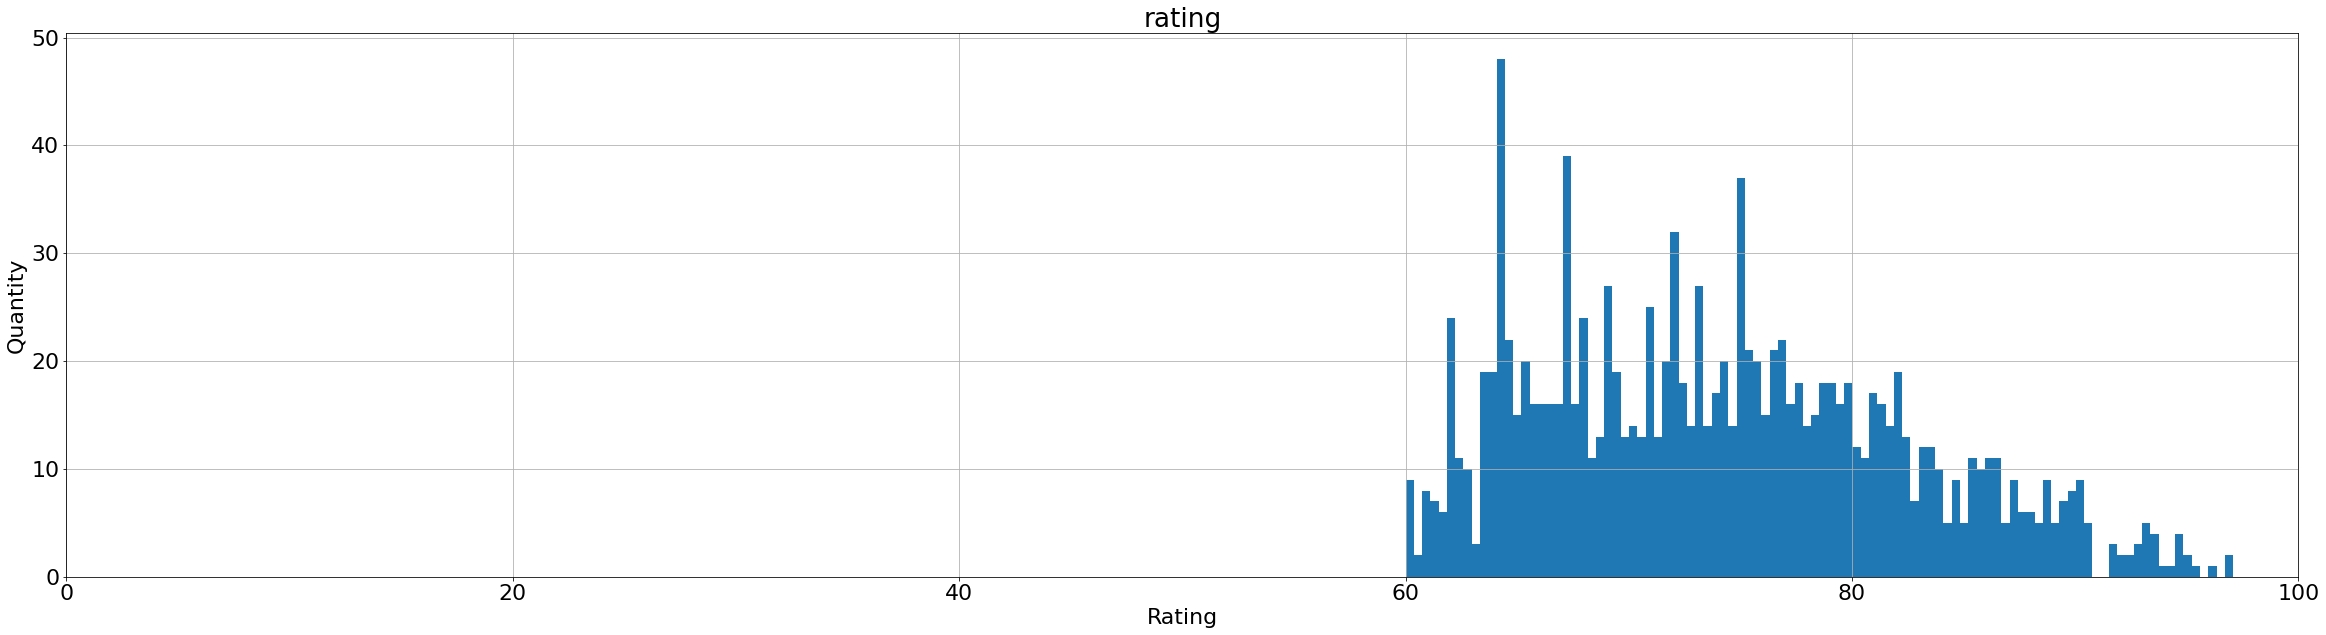

In [90]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})

gamesdf.hist(column='rating',bins=100,figsize=(40,10))
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.xlim(0,100)

In [59]:
gamesdf.sort_values(by='current_price')

name  \
1019                     Khan VS Kahn   
662                   Regions Of Ruin   
847            Welcome Back To 2007 2   
818                Escape From Tethys   
395                         Drawful 2   
...                               ...   
591                         GreedFall   
1265    Conan Exiles - Deluxe Edition   
1186    STAR WARS Jedi: Fallen Order™   
1266  Conan Exiles - Complete Edition   
1128  VEGAS Pro 17 Edit Steam Edition   

                                           tags percent_discount  \
1019       [Free To Keep, new highest discount]            -100%   
662        [Free To Keep, new highest discount]            -100%   
847        [Free To Keep, new highest discount]            -100%   
818        [Free To Keep, new highest discount]            -100%   
395        [Free To Keep, new highest discount]            -100%   
...                                         ...              ...   
591                      [new highest discount]             -40%   
1265                           [Weeklong Deals]             -50%   
1186  [BAFTA Game Awards, new highest discount]             -40%   
1266                           [Weeklong Deals]             -40%   
1128          [lowest price is $199.50 at -50%]             -45%   

      current_price  rating  
1019           0.00  65.25%  
662            0.00  82.35%  
847            0.00  65.06%  
818            0.00  66.03%  
395            0.00  71.70%  
...             ...     ...  
591           29.99  79.30%  
1265          34.99  75.12%  
1186          35.99  90.27%  
1266          59.99  75.08%  
1128         219.45  65.86%  

[1269 rows x 5 columns]